In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from equipartition import Equipartition
import time

equipartition is a vectorized python library used to compute equipartition energies, radii, etc., using the prescription in Matsumoto and Piran 2023 (MP23). Units are cgs and Gaussian but observables are placed into the Equipartition constructor with the following units:
- flux: millijansky
- peak frequency: Hz/$10^{10}$
- observer time: days
- redshift: unitless
- viewing angle: radians
- radius (optional): cm/$10^{17}$
- minimum frequency (optional): Hz/$10^{10}$
- absorption frequency (optional): Hz/$10^{10}$
- area filling factor (optional): unitless
- volume filling factor (optional): unitless

First we import some data from something like a spreadsheet.

In [3]:
fileName = "Cendes_et_al_2021.xlsx" # Table 2 data AT 2019dsg of Cendes et al 2021 used in MP23 figure 3

data_pd = pd.read_excel(fileName)
data = data_pd.to_numpy()
data_pd

,δt,-,Fp [mJy],+,-.1,log(νp),+.1,z
0,52,0.09,0.47,0.06,0.09,10.20,0.10,0.051
1,55,0.04,0.60,0.03,0.09,10.32,0.13,0.051
2,60,0.01,0.67,0.01,0.03,10.26,0.03,0.051
3,80,0.06,0.80,0.06,0.06,10.14,0.05,0.051
4,82,0.03,0.65,0.03,0.03,10.03,0.03,0.051
5,130,0.05,1.24,0.05,0.04,10.01,0.04,0.051
6,161,0.04,0.98,0.04,0.03,9.98,0.04,0.051
7,188,0.04,1.22,0.04,0.02,9.71,0.04,0.051
8,300,0.04,0.79,0.04,0.05,9.55,0.03,0.051
9,561,0.04,0.34,0.03,0.11,9.23,0.11,0.051


In [4]:
z = data[:, 7]
tdays = data[:, 0]
FpmJy = data[:, 2]
logNup = data[:, 5]

z = z[2:] # drop the lowest two times
tdays = tdays[2:]; print("time in days:\n", tdays)
FpmJy = FpmJy[2:]
logNup = logNup[2:]

nup10 = 10**logNup/1e10

theta = np.logspace(-0.6, 0.2, 9)

time in days:
 [ 60.  80.  82. 130. 161. 188. 300. 561.]


In [5]:
start = time.time()

equip_Newtonian = Equipartition(FpmJy, nup10, tdays, z, 0, newtonian = True)

end = time.time()

print("time to run Newtonian:", (end - start) * 1000, "ms")

start = time.time()

equip_onAxis = [Equipartition(FpmJy, nup10, tdays, z, thet, newtonian = False, onAxis = True) for thet in theta] # solving ~70 four velocities
equip_offAxis = [Equipartition(FpmJy, nup10, tdays, z, thet, newtonian = False, onAxis = False) for thet in theta] # solving ~70 four velocities

end = time.time()
print("time to run relativistic:", (end - start) * 1000, "ms")

time to run Newtonian: 552.0250797271729 ms
time to run relativistic: 446.66409492492676 ms


The equipartition energy and radii can be found by calling the relevant methods on the Equipartition instance.

In [7]:
energyeq_Newtonian = equip_Newtonian.energyeq(); print("Newtonian equipartition energy:\n", energyeq_Newtonian)

Newtonian equipartition energy:
 [3.91626006e+46 6.36030033e+46 6.41781908e+46 1.43680314e+47
 1.16725875e+47 2.81247845e+47 2.43809535e+47 1.88924434e+47]


In [8]:
energyeq_onAxisLargestAngle = equip_onAxis[-1].energyeq(); print("on axis equipartition energy:\n", energyeq_onAxisLargestAngle)

on axis equipartition energy:
 [3.93724402e+46 6.39886517e+46 6.46667996e+46 1.44582206e+47
 1.17200622e+47 2.84322114e+47 2.45368765e+47 1.89668220e+47]


In [9]:
energyeq_offAxisLargestAngle = equip_offAxis[-1].energyeq(); print("off axis equipartition energy:\n", energyeq_offAxisLargestAngle)

off axis equipartition energy:
 [8.49982230e+49 1.15073811e+50 8.33949914e+49 2.47102782e+50
 3.82462026e+50 2.18130045e+50 4.08032448e+50 6.50259424e+50]


In [10]:
Req_Newtonian = equip_Newtonian.Req(); print("Newtonian equipartition radius:\n", Req_Newtonian)

Newtonian equipartition radius:
 [6.76057920e+15 9.68782633e+15 1.13185367e+16 1.60617996e+16
 1.54064348e+16 3.18032115e+16 3.74675737e+16 5.26442020e+16]


In [11]:
Req_onAxisLargestAngle = equip_onAxis[-1].Req(); print("on axis equipartition radius:\n", Req_onAxisLargestAngle)

on axis equipartition radius:
 [6.77242094e+15 9.70723552e+15 1.13475344e+16 1.60952097e+16
 1.54263939e+16 3.19231947e+16 3.75471002e+16 5.27100039e+16]


In [12]:
Req_offAxisLargestAngle = equip_offAxis[-1].Req(); print("off axis equipartition radius:\n", Req_offAxisLargestAngle)

off axis equipartition radius:
 [1.44869023e+17 1.93021102e+17 1.97549374e+17 3.13592754e+17
 3.89261943e+17 4.51561360e+17 7.23591191e+17 1.35656547e+18]


Next we will reproduce the MP23 figure 9 plot using matplotlib.

C:\Users\rohdo\AppData\Local\Temp\ipykernel_28072\3328169649.py:67: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


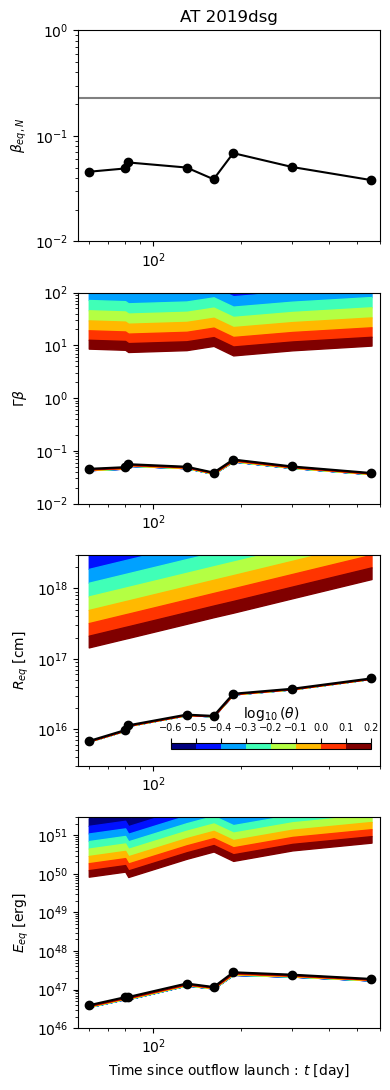

In [14]:
cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
#cmaplist[0] = (.5, .5, .5, 1.0)
# create the new map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(-0.6, 0.2 + 1e-14, 0.1)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(4, 1, layout='constrained', figsize=(4,11))
ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]
ax4 = ax[3]

xleft = 55
xright = 600

ax1.set_title("AT 2019dsg")
ax1.set_xscale("log")
ax1.set_xlim(xleft, xright)
ax1.set_yscale("log")
ax1.set_ylim(1e-2, 1)
ax1.set_ylabel(r"$\beta_{eq, N}$")
ax1.axhline(0.23, color = "gray")
ax1.plot(tdays, equip_Newtonian.betaeqN(), color = "k", marker = "o")

#plt.subplot(4, 1, 2)
ax2.set_xscale("log")
ax2.set_xlim(xleft, xright)
ax2.set_yscale("log")
ax2.set_ylim(1e-2, 1e2)
ax2.set_ylabel(r"$\Gamma\beta$")
ax2.plot(tdays, equip_Newtonian.gammaBeta(), color = "k", marker = "o")
for i in range(0, len(theta) - 1):
    #ax2.plot(tdays, equip_onAxis[i].gammaBeta(), color = cmap(norm(np.log10(theta[i]))), alpha = 0.5)#; print(equip_onAxis[i].gammaBulk())
    #ax2.plot(tdays, equip_offAxis[i].gammaBeta(), color = cmap(norm(np.log10(theta[i]))), alpha = 0.5)#; print(equip_offAxis[i].gammaBeta())
    ax2.fill_between(tdays, equip_onAxis[i].gammaBeta(), equip_onAxis[i + 1].gammaBeta(), color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))
    ax2.fill_between(tdays, equip_offAxis[i].gammaBeta(), equip_offAxis[i + 1].gammaBeta(), color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))

#plt.subplot(4, 1, 3)
ax3.set_xscale("log")
ax3.set_xlim(xleft, xright)
ax3.set_yscale("log")
ax3.set_ylim(3e15, 3e18)
ax3.set_ylabel(r"$R_{eq}$ [cm]")
ax3.plot(tdays, equip_Newtonian.Req(), color = "k", marker = "o")
for i in range(0, len(theta) - 1):
    ax3.fill_between(tdays, equip_onAxis[i].Req(), equip_onAxis[i + 1].Req(), color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))
    ax3.fill_between(tdays, equip_offAxis[i].Req(), equip_offAxis[i + 1].Req(), color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))

#plt.subplot(4, 1, 4)
ax4.set_xscale("log")
ax4.set_xlim(xleft, xright)
ax4.set_yscale("log")
ax4.set_xlabel(r"Time since outflow launch : $t$ [day]")
ax4.set_ylim(1e46, 3e51)
ax4.set_ylabel(r"$E_{eq}$ [erg]")
ax4.plot(tdays, equip_Newtonian.energyeq(), color = "k", marker = "o")#, lw = 0.5)
for i in range(0, len(theta) - 1):
    ax4.fill_between(tdays, equip_onAxis[i].energyeq(), equip_onAxis[i + 1].energyeq(), color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))
    ax4.fill_between(tdays, equip_offAxis[i].energyeq(), equip_offAxis[i + 1].energyeq(), color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))

#plt.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
plt.tight_layout()
cax = fig.add_axes([0.44, 0.315, 0.5, 0.005])
cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm = norm, cmap = cmap), cax = cax, orientation = "horizontal", label = r"$\log_{10}(\theta)$", location = "top")
cbar.ax.tick_params(labelsize=7)

Using tabulated solutions for the four velocity solution takes less time but yields significantly less accurate results due to the required linear interpolation.

In [16]:
start = time.time()
    
equip_tableNewtonian = Equipartition(FpmJy, nup10, tdays, z, 0, newtonian = True, table = True)

end = time.time()

print("time to run Newtonian:", (end - start) * 1000, "ms")

start = time.time()

equip_tableOnAxis = [Equipartition(FpmJy, nup10, tdays, z, thet, newtonian = False, onAxis = True, table = True) for thet in theta]
equip_tableOffAxis = [Equipartition(FpmJy, nup10, tdays, z, thet, newtonian = False, onAxis = False, table = True) for thet in theta]

end = time.time()
print("time to run relativistic:", (end - start) * 1000, "ms")

time to run Newtonian: 62.74247169494629 ms
time to run relativistic: 188.45295906066895 ms
